In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# import dependencies for file processing
import os
import csv
import numpy as np

In [3]:
# filepath
a_z_path = 'data/A_Z Handwritten Data.csv'

In [4]:
# readfile
with open(a_z_path) as training_file:
        reader = csv.reader(training_file, delimiter = ',')
        header = []
        labels = []
        images = []
        for row in reader:
            labels.append(row[0])
            pixel = np.array(row[1:785])
            # images are of 28 x 28 grayscale
            pix_split = np.array_split(pixel, 28)
            images.append(pix_split)   

In [5]:
NUM_LABELS = len(labels)
NUM_IMAGES = len(images)
NUM_UNIQUE_LABELS = len(list(set(labels)))
unique_labels = list(set(labels))

In [6]:
print('Number of Images:', NUM_IMAGES)
print('Number of Labels:', NUM_LABELS)
print('Number of Unique Labels:', NUM_UNIQUE_LABELS)

Number of Images: 372451
Number of Labels: 372451
Number of Unique Labels: 26


In [7]:
# shuffle list
import random
zipped = list(zip(images, labels))
shuffled = random.sample(zipped, len(zipped))

In [8]:
# unpack images and labels
shuffled_images, shuffled_labels = zip(*shuffled)

In [9]:
# set split value
split_frac = 0.9
split_num = int(split_frac*len(shuffled_images))

In [10]:
# split into train and test
train_images = shuffled_images[: split_num]
train_labels = shuffled_labels[: split_num]
test_images = shuffled_images[split_num : ]
test_labels = shuffled_labels[split_num : ]

In [11]:
print('Number of Train Images:', len(train_images))
print('Number of Train Labels:',len(train_labels))
print('Number of Test Images:',len(test_images))
print('Number of Test Labels:',len(test_labels))

Number of Train Images: 335205
Number of Train Labels: 335205
Number of Test Images: 37246
Number of Test Labels: 37246


In [12]:
# convert data to arrays
train_images = np.array(train_images).astype(float)
train_labels = np.array(train_labels).astype(float)
test_images = np.array(test_images).astype(float)
test_labels = np.array(test_labels).astype(float)

In [13]:
import string
# list to hold alphabets
chars = []
# loop and append letters to chars
for letter in string.ascii_uppercase:
    chars.append(letter)

In [14]:
# create a dictionary to map labels to alphabets
print('There are {} characters of the alphabet in chars.'.format(len(chars)))
idx_to_char = {x:chars[x] for x in range(0, 26)}

There are 26 characters of the alphabet in chars.


In [30]:
chars

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [15]:
# inspect idx_to_chars
idx_to_char

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

Train label 2.0 : C


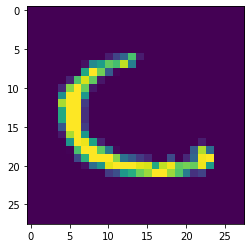

In [16]:
# inspect the images
# print a random item
import numpy as np
np.set_printoptions(linewidth=200)
num_index = np.random.randint(0, int(len(train_images)))
import matplotlib.pyplot as plt
plt.imshow(train_images[num_index])
train_label = train_labels[num_index]
print('Train label {} : {}'.format(train_label, idx_to_char[int(train_label)]))
# print(train_images[num_index])

In [17]:
# expand dimensions
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis = -1)

In [18]:
print('Shape of train_images:', train_images.shape)
print('Shape of test_images:', test_images.shape)

Shape of train_images: (335205, 28, 28, 1)
Shape of test_images: (37246, 28, 28, 1)


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# BATCH_SIZE AS HYPERPARAMETER
BATCH_SIZE = 128
# creat ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
)
train_generator = train_datagen.flow(
    train_images,
    train_labels,
    batch_size = BATCH_SIZE
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255.
)
validation_generator = validation_datagen.flow(
    test_images,
    test_labels,
    batch_size = BATCH_SIZE
)

In [20]:
# define a model
# use Conv2D and maxPooling2D
model = tf.keras.models.Sequential([
    # 1st convolution
    tf.keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution
    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 3rdd convolution
    tf.keras.layers.Conv2D(64,(3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten the results and feed into dnn
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
    # 512 neuron
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(26, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [21]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
# train the model for 10 epochs with data augmentation
# history = model.fit(train_generator, validation_data =validation_generator, epochs = 50, verbose = 1)
# train model without data augmentation
history = model.fit(train_images, train_labels, validation_data =(test_images, test_labels), epochs = 10, verbose = 1)

Epoch 1/10
10476/10476 [==============================] - 34s 3ms/step - loss: 0.2126 - accuracy: 0.9399 - val_loss: 0.1404 - val_accuracy: 0.9603
Epoch 2/10
10476/10476 [==============================] - 29s 3ms/step - loss: 0.1113 - accuracy: 0.9681 - val_loss: 0.1225 - val_accuracy: 0.9669
Epoch 3/10
10476/10476 [==============================] - 28s 3ms/step - loss: 0.0971 - accuracy: 0.9723 - val_loss: 0.1036 - val_accuracy: 0.9705
Epoch 4/10
10476/10476 [==============================] - 29s 3ms/step - loss: 0.0905 - accuracy: 0.9741 - val_loss: 0.1024 - val_accuracy: 0.9729
Epoch 5/10
10476/10476 [==============================] - 28s 3ms/step - loss: 0.0879 - accuracy: 0.9749 - val_loss: 0.1179 - val_accuracy: 0.9675
Epoch 6/10
10476/10476 [==============================] - 34s 3ms/step - loss: 0.0856 - accuracy: 0.9759 - val_loss: 0.0965 - val_accuracy: 0.9755
Epoch 7/10
10476/10476 [==============================] - 30s 3ms/step - loss: 0.0834 - accuracy: 0.9763 - val_loss: 0

Text(0.5, 1.0, 'Training and validation loss')

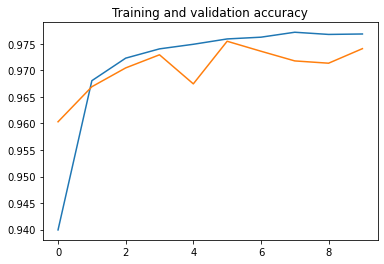

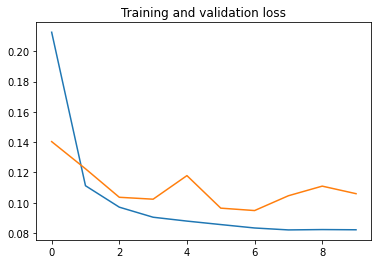

In [23]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss')

In [28]:
# save model by timestamp
import time
saved_model_path = 'models/a_z_saved_model.h5'
model.save(saved_model_path)

In [29]:
# convert to tensorflow.js
!tensorflowjs_converter --input_format=keras {saved_model_path} ./